In [1]:
import keras
from pandas import DataFrame as df
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

Using TensorFlow backend.


In [29]:
root_dir = 'e:/Kaggle/03_dog_breed_identification/'
train_dir = root_dir+'train/'
test_dir = root_dir+'test/'

labels_file = root_dir+'labels.csv'
submission_file = root_dir+'sample_submission.csv'


In [3]:
def resize_img(img, dsize=(64,64)):
    
    ori_y, ori_x,ori_z = img.shape[:3]
    d_y,d_x = dsize
    
    #dsize_keep_aspect_ratio
    dsize_kar = (ori_y*d_x//ori_x ,d_x) if (ori_y//ori_x >= d_y//d_x) else ( d_y ,ori_x*d_y//ori_y)
    #print(dsize_kar)
    
    img = cv2.resize(img,dsize = (dsize_kar[1],dsize_kar[0]))
    #print(img.shape)
    img = img[:d_y,:d_x,:] #
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [28]:
labels = df.from_csv(labels_file)
all_data = []
for i, f in enumerate(labels.index):
    img = cv2.imread(train_dir+f+'.jpg')
    img = resize_img(img)
    all_data.append(img)
    #if not i%1000:
    #    print(i)
    

all_data = np.array(all_data)

all_data.shape

(10222, 64, 64, 3)

In [30]:
submission = df.from_csv(submission_file)

In [37]:
submission.head()
classes = submission.columns.values

In [49]:

from sklearn.preprocessing import label_binarize

targets = labels.breed
y = label_binarize(targets, classes = classes)
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(all_data, y, test_size=0.2, random_state=42)

In [51]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense

img_rows, img_cols, img_channel = 64, 64, 3

base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))

In [52]:
num_class = labels.breed.nunique()

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(num_class, activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [53]:
add_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               245880    
Total params: 245,880
Trainable params: 245,880
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

Train on 8177 samples, validate on 2045 samples
Epoch 1/20
8177/8177 [==============================] - 2460s 301ms/step - loss: 0.1262 - acc: 0.9865 - val_loss: 0.0598 - val_acc: 0.9914

In [ ]:
loss_and_metrics = model.evaluate(X_val, y_test, batch_size=128)

In [112]:
model.save('dog_breed_identification.m')

In [113]:
test_labels = df.from_csv(rst_file)
test_data = []
for i, f in enumerate(test_labels.index):
    img = cv2.imread(test_dir+f+'.jpg')
    img = resize_img(img)
    val_data.append(img)
    #if not i%1000:
    #    print(i)
    

test_data = np.array(test_data)

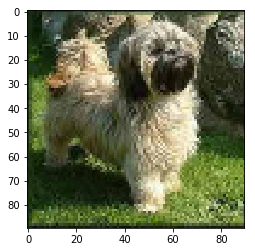

In [135]:
plt.imshow(val_data[4])

In [115]:
predict = model.predict(test_data)

In [126]:
predict_df = df(predict, columns=test_labels.columns, index=test_labels.index)
predict_df.to_csv(test_dir+'predict.csv')

In [136]:
predict2 = model.predict(all_data)
predict_df = df(predict, columns=test_labels.columns, index=test_labels.index)
predict_df.to_csv(test_dir+'predict2.csv')

NameError: name 'test_labels' is not defined